<center><h1>Marketing Attribution - First and Last Touch</h1></center>

This SQL project focuses on analyzing user interactions with a website, specifically examining first and last touchpoints. The project is split into two parts. In the first part, the query identifies each user's first visit to the site (first_touch) by selecting the minimum timestamp of their page visits. It then counts how many times each user visited that first page and groups the data by the campaign that brought them to the site (utm_campaign), also including the page name and source of the visit.

The second part of the project follows a similar approach but for the last touchpoint, concentrating on users who made a purchase (page_name = '4 - purchase'). It calculates the maximum timestamp for each user's page visits to find their last interaction before purchase. The query then counts the total number of last touches, grouping them by the marketing campaign, and includes details about the page name and source. Overall, the project aims to provide insights into the effectiveness of different marketing campaigns in attracting first-time visitors and converting them into customers.

In [ ]:
-- Create a first touch aggregate table
WITH first_touch AS (
    SELECT user_id,
        MIN(timestamp) as first_touch_at -- first click
    FROM page_visits
    GROUP BY user_id)
SELECT ft.user_id,
    pv.page_name,
    COUNT(ft.first_touch_at) as total_first_touch,
    pv.utm_source,
		pv.utm_campaign
FROM first_touch ft
JOIN page_visits pv
    ON ft.user_id = pv.user_id
    AND ft.first_touch_at = pv.timestamp
GROUP BY utm_campaign;

-- Create a last touch aggregate table
WITH last_touch AS (
  SELECT user_id,
         MAX(timestamp) AS last_touch_at -- last click
  FROM page_visits
  WHERE page_name = '4 - purchase' -- ensures the last touch query is only for purchases
  GROUP BY user_id)
SELECT lt.user_id,
    pv.page_name,
    COUNT(lt.last_touch_at) as total_last_touch,
    pv.utm_source,
		pv.utm_campaign
FROM last_touch lt
JOIN page_visits pv
    ON lt.user_id = pv.user_id
    AND lt.last_touch_at = pv.timestamp
GROUP BY utm_campaign;;

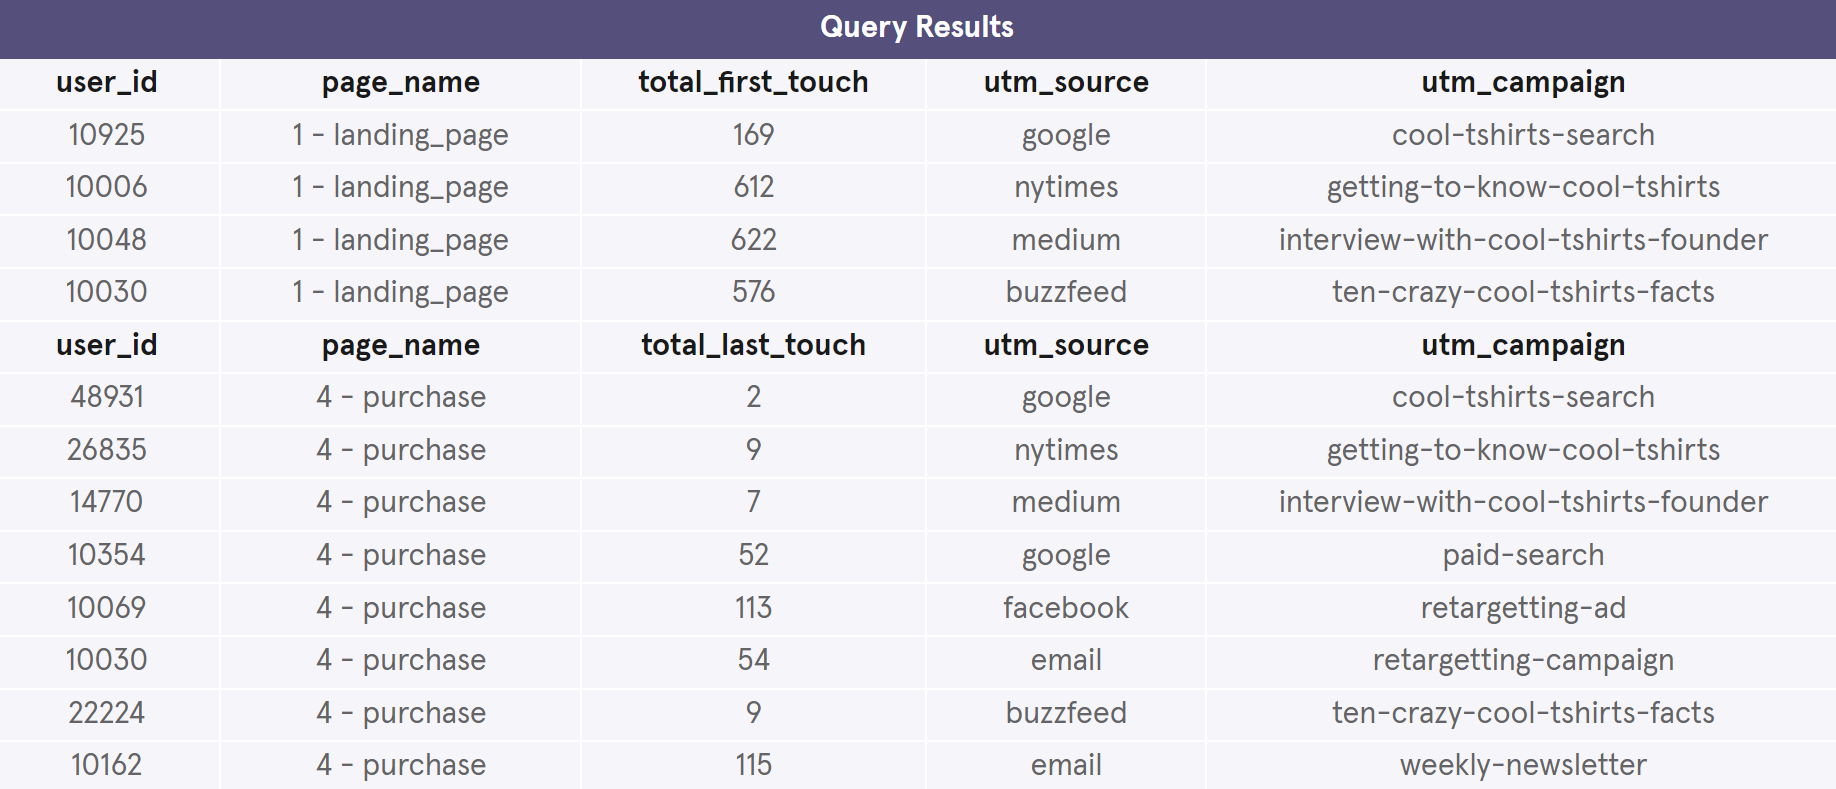

## Recommendations
Based on the results, the website should re-invest their initial targetting ads into:

* Medium
* New York Times
* Buzzfeed

These ad campaigns yielded the highest amount of first clicks to their website.

The website should also re-invest their retargetting ad-campaign into:

* Facebook - ads
* Emails - both weekly newsletters and retargetting ads
* Google - paid search ads

These ads yielded the highest purchases out of any other retargetting campaign ads.